In [4]:
import anndata
from os import path
data_dir = '/cellar/users/hsher/Data/popgen'

adata = anndata.read_h5ad(path.join(data_dir,'par_knn_final.h5ad'))

In [6]:
adata.obs['pop'].unique()

[Shang-Fu Chen, Sheng-Yong Niu, Mandenka, Biaka, BantuKenya, ..., STU, ITU, ASW, MXL, GIH]
Length: 72
Categories (72, object): [Shang-Fu Chen, Sheng-Yong Niu, Mandenka, Biaka, ..., ITU, ASW, MXL, GIH]

In [7]:
adata.obs

,pop,super_pop,gender,batch
sfc_23andme,Shang-Fu Chen,Shang-Fu Chen,M,23andme
syn_23andme,Sheng-Yong Niu,Sheng-Yong Niu,M,23andme
HGDP01201,Mandenka,AFR,F,HGDP
HGDP00479,Biaka,AFR,M,HGDP
HGDP01408,BantuKenya,AFR,M,HGDP
...,...,...,...,...
NA21137,GIH,CENTRAL_SOUTH_ASIA,F,1000 genome
NA21141,GIH,CENTRAL_SOUTH_ASIA,F,1000 genome
NA21142,GIH,CENTRAL_SOUTH_ASIA,F,1000 genome
NA21143,GIH,CENTRAL_SOUTH_ASIA,F,1000 genome


In [62]:
adata.obsm

AxisArrays with keys: X_draw_graph_fr, X_pca, X_tsne, X_umap

In [42]:
from scipy.spatial.distance import cdist
import numpy as np
def intra_cluster_distance(adata, group, group_col = 'super_pop', key = 'X_draw_graph_fr'):
    
    group_ids = adata.obs.loc[adata.obs[group_col] == group].index
    group_ids = np.array([list(adata.obs.index).index(g) for g in group_ids])
    #print(group_ids)
    group_pos = adata.obsm[key][group_ids]
    
    d_matrix = cdist(group_pos, group_pos, 'euclidean')
    d_upper = np.triu(d_matrix).reshape(-1)
    d_upper = d_upper[np.where(d_upper != 0)]
    return(np.mean(d_upper))
def inter_cluster_distance(adata, group1,group2, group_col = 'super_pop', key = 'X_draw_graph_fr'):
    
    # group1
    group1_ids = adata.obs.loc[adata.obs[group_col] == group1].index
    group1_ids = np.array([list(adata.obs.index).index(g) for g in group1_ids])
    #print(group_ids)
    group1_pos = adata.obsm[key][group1_ids]
    
    group2_ids = adata.obs.loc[adata.obs[group_col] == group2].index
    group2_ids = np.array([list(adata.obs.index).index(g) for g in group2_ids])
    #print(group_ids)
    group2_pos = adata.obsm[key][group2_ids]
    
    d_matrix = cdist(group1_pos, group2_pos, 'euclidean')
    d_upper = np.triu(d_matrix).reshape(-1)
    d_upper = d_upper[np.where(d_upper != 0)]
    return(np.mean(d_upper))

In [45]:
d = intra_cluster_distance(adata, 'EAS')

In [43]:
d = inter_cluster_distance(adata, 'EAS', 'AFR')

In [50]:
from itertools import combinations 
sp = ['AFR','EAS', 'EUR','CENTRAL_SOUTH_ASIA', 'AMR', 'OCEANIA', 'MIDDLE_EAST']
intra_sp = [intra_cluster_distance(adata, p) for p in sp]
inter_sp = [inter_cluster_distance(adata, p1, p2) for (p1, p2) in combinations(sp,2)]


[Shang-Fu Chen, Sheng-Yong Niu, AFR, EAS, EUR, CENTRAL_SOUTH_ASIA, AMR, OCEANIA, MIDDLE_EAST]
Categories (9, object): [Shang-Fu Chen, Sheng-Yong Niu, AFR, EAS, ..., CENTRAL_SOUTH_ASIA, AMR, OCEANIA, MIDDLE_EAST]

[12.83717979226553,
 14.547050592640101,
 11.656717273166969,
 10.31937769008575,
 14.603157005290042,
 12.973919445974454,
 21.621583710138776,
 14.743647883629055,
 14.438539413398894,
 15.387387547327386,
 15.591907125627717,
 20.1234649222316,
 11.146635438182576,
 18.416602262634626,
 12.240779898471231,
 9.077619984834023,
 13.926540163927633,
 11.835841605585482,
 18.83811399432077,
 14.016859130488703,
 15.345931239685957]

Text(0.5, 0.98, 'Superpopulation')

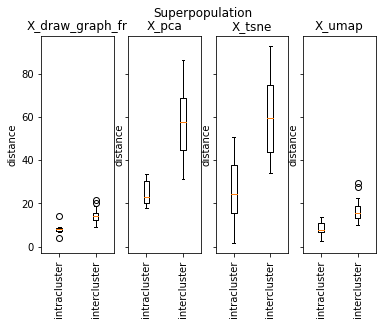

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(1,4, sharey = True)

i = 0
for embed in ['X_draw_graph_fr', 'X_pca', 'X_tsne', 'X_umap']:

    sp = ['AFR','EAS', 'EUR','CENTRAL_SOUTH_ASIA', 'AMR', 'OCEANIA', 'MIDDLE_EAST']
    intra_sp = [intra_cluster_distance(adata, p, key = embed) for p in sp]
    inter_sp = [inter_cluster_distance(adata, p1, p2, key = embed) for (p1, p2) in combinations(sp,2)]

    ax[i].boxplot([intra_sp, inter_sp])
    ax[i].set_title(embed)
    ax[i].set_xticks(np.arange(1,3))
    ax[i].set_xticklabels(['intracluster', 'intercluster'], rotation = 90)
    ax[i].set_ylabel('distance')
    
    i+=1
plt.suptitle('Superpopulation')

In [71]:
adata.obs['pop'].unique()[2:20]

[Mandenka, Biaka, BantuKenya, Mbuti, YRI, ..., Pathan, Bougainville, Tujia, Cambodian, Hazara]
Length: 18
Categories (72, object): [Shang-Fu Chen, Sheng-Yong Niu, Mandenka, Biaka, ..., ITU, ASW, MXL, GIH]

Text(0.5, 0.98, 'Population')

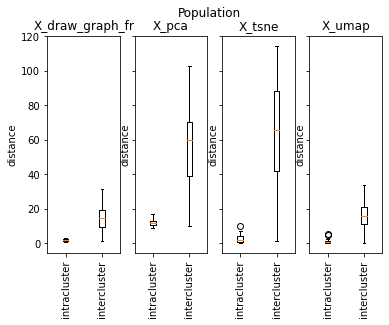

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(1,4, sharey = True)

i = 0
for embed in ['X_draw_graph_fr', 'X_pca', 'X_tsne', 'X_umap']:

    sp = adata.obs['pop'].unique()[2:20]
    intra_sp = [intra_cluster_distance(adata, p, key = embed, group_col = 'pop') for p in sp]
    inter_sp = [inter_cluster_distance(adata, p1, p2, key = embed, group_col = 'pop') for (p1, p2) in combinations(sp,2)]

    ax[i].boxplot([intra_sp, inter_sp])
    ax[i].set_title(embed)
    ax[i].set_xticks(np.arange(1,3))
    ax[i].set_xticklabels(['intracluster', 'intercluster'], rotation = 90)
    ax[i].set_ylabel('distance')
    
    i+=1
plt.suptitle('Population')